<a href="https://colab.research.google.com/github/sankettgorey/Ten-Year-CHD-Prediction/blob/main/CHD_Prediction_Sanket_Gore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

Data Description
Demographic:
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous) 

Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - Dependent Variable

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the file
df = pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv')

In [ ]:
#printing the first 5 entries 
df.head()

id  age  education sex  ...    BMI  heartRate  glucose  TenYearCHD
0   0   64        2.0   F  ...    NaN       90.0     80.0           1
1   1   36        4.0   M  ...  29.77       72.0     75.0           0
2   2   46        1.0   F  ...  20.35       88.0     94.0           0
3   3   50        1.0   M  ...  28.26       68.0     94.0           1
4   4   64        1.0   F  ...  26.42       70.0     77.0           0

[5 rows x 17 columns]

In [ ]:
df.shape

(3390, 17)

# EDA

In [ ]:
# setting max column limit to none to see all columns in the df
pd.pandas.set_option('display.max_columns', None)

In [ ]:
# printing more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# printing the value counts of dependent variable
df.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

* It can be seen that given dataset is imbalanced. People with no disease have 2879 entries compared to people with CHD entries of 511.

In [ ]:
plt.rcParams['figure.figsize'] = 12, 8

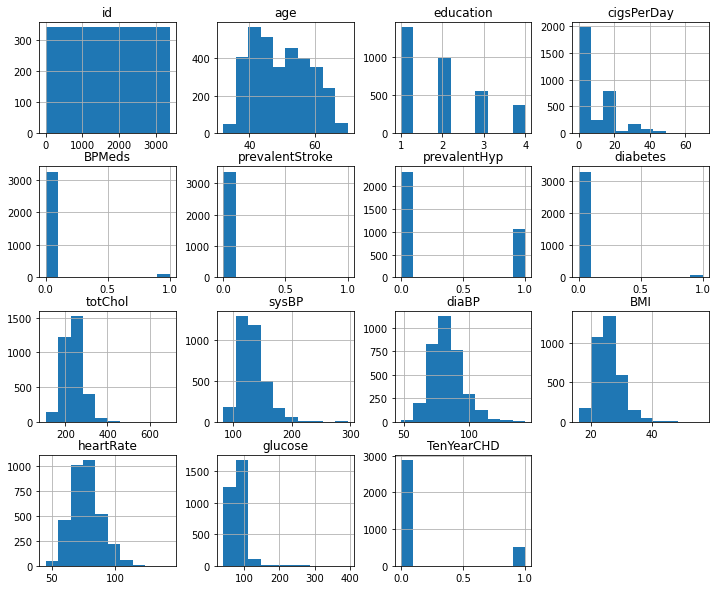

In [ ]:
df.hist(figsize = (12, 10));

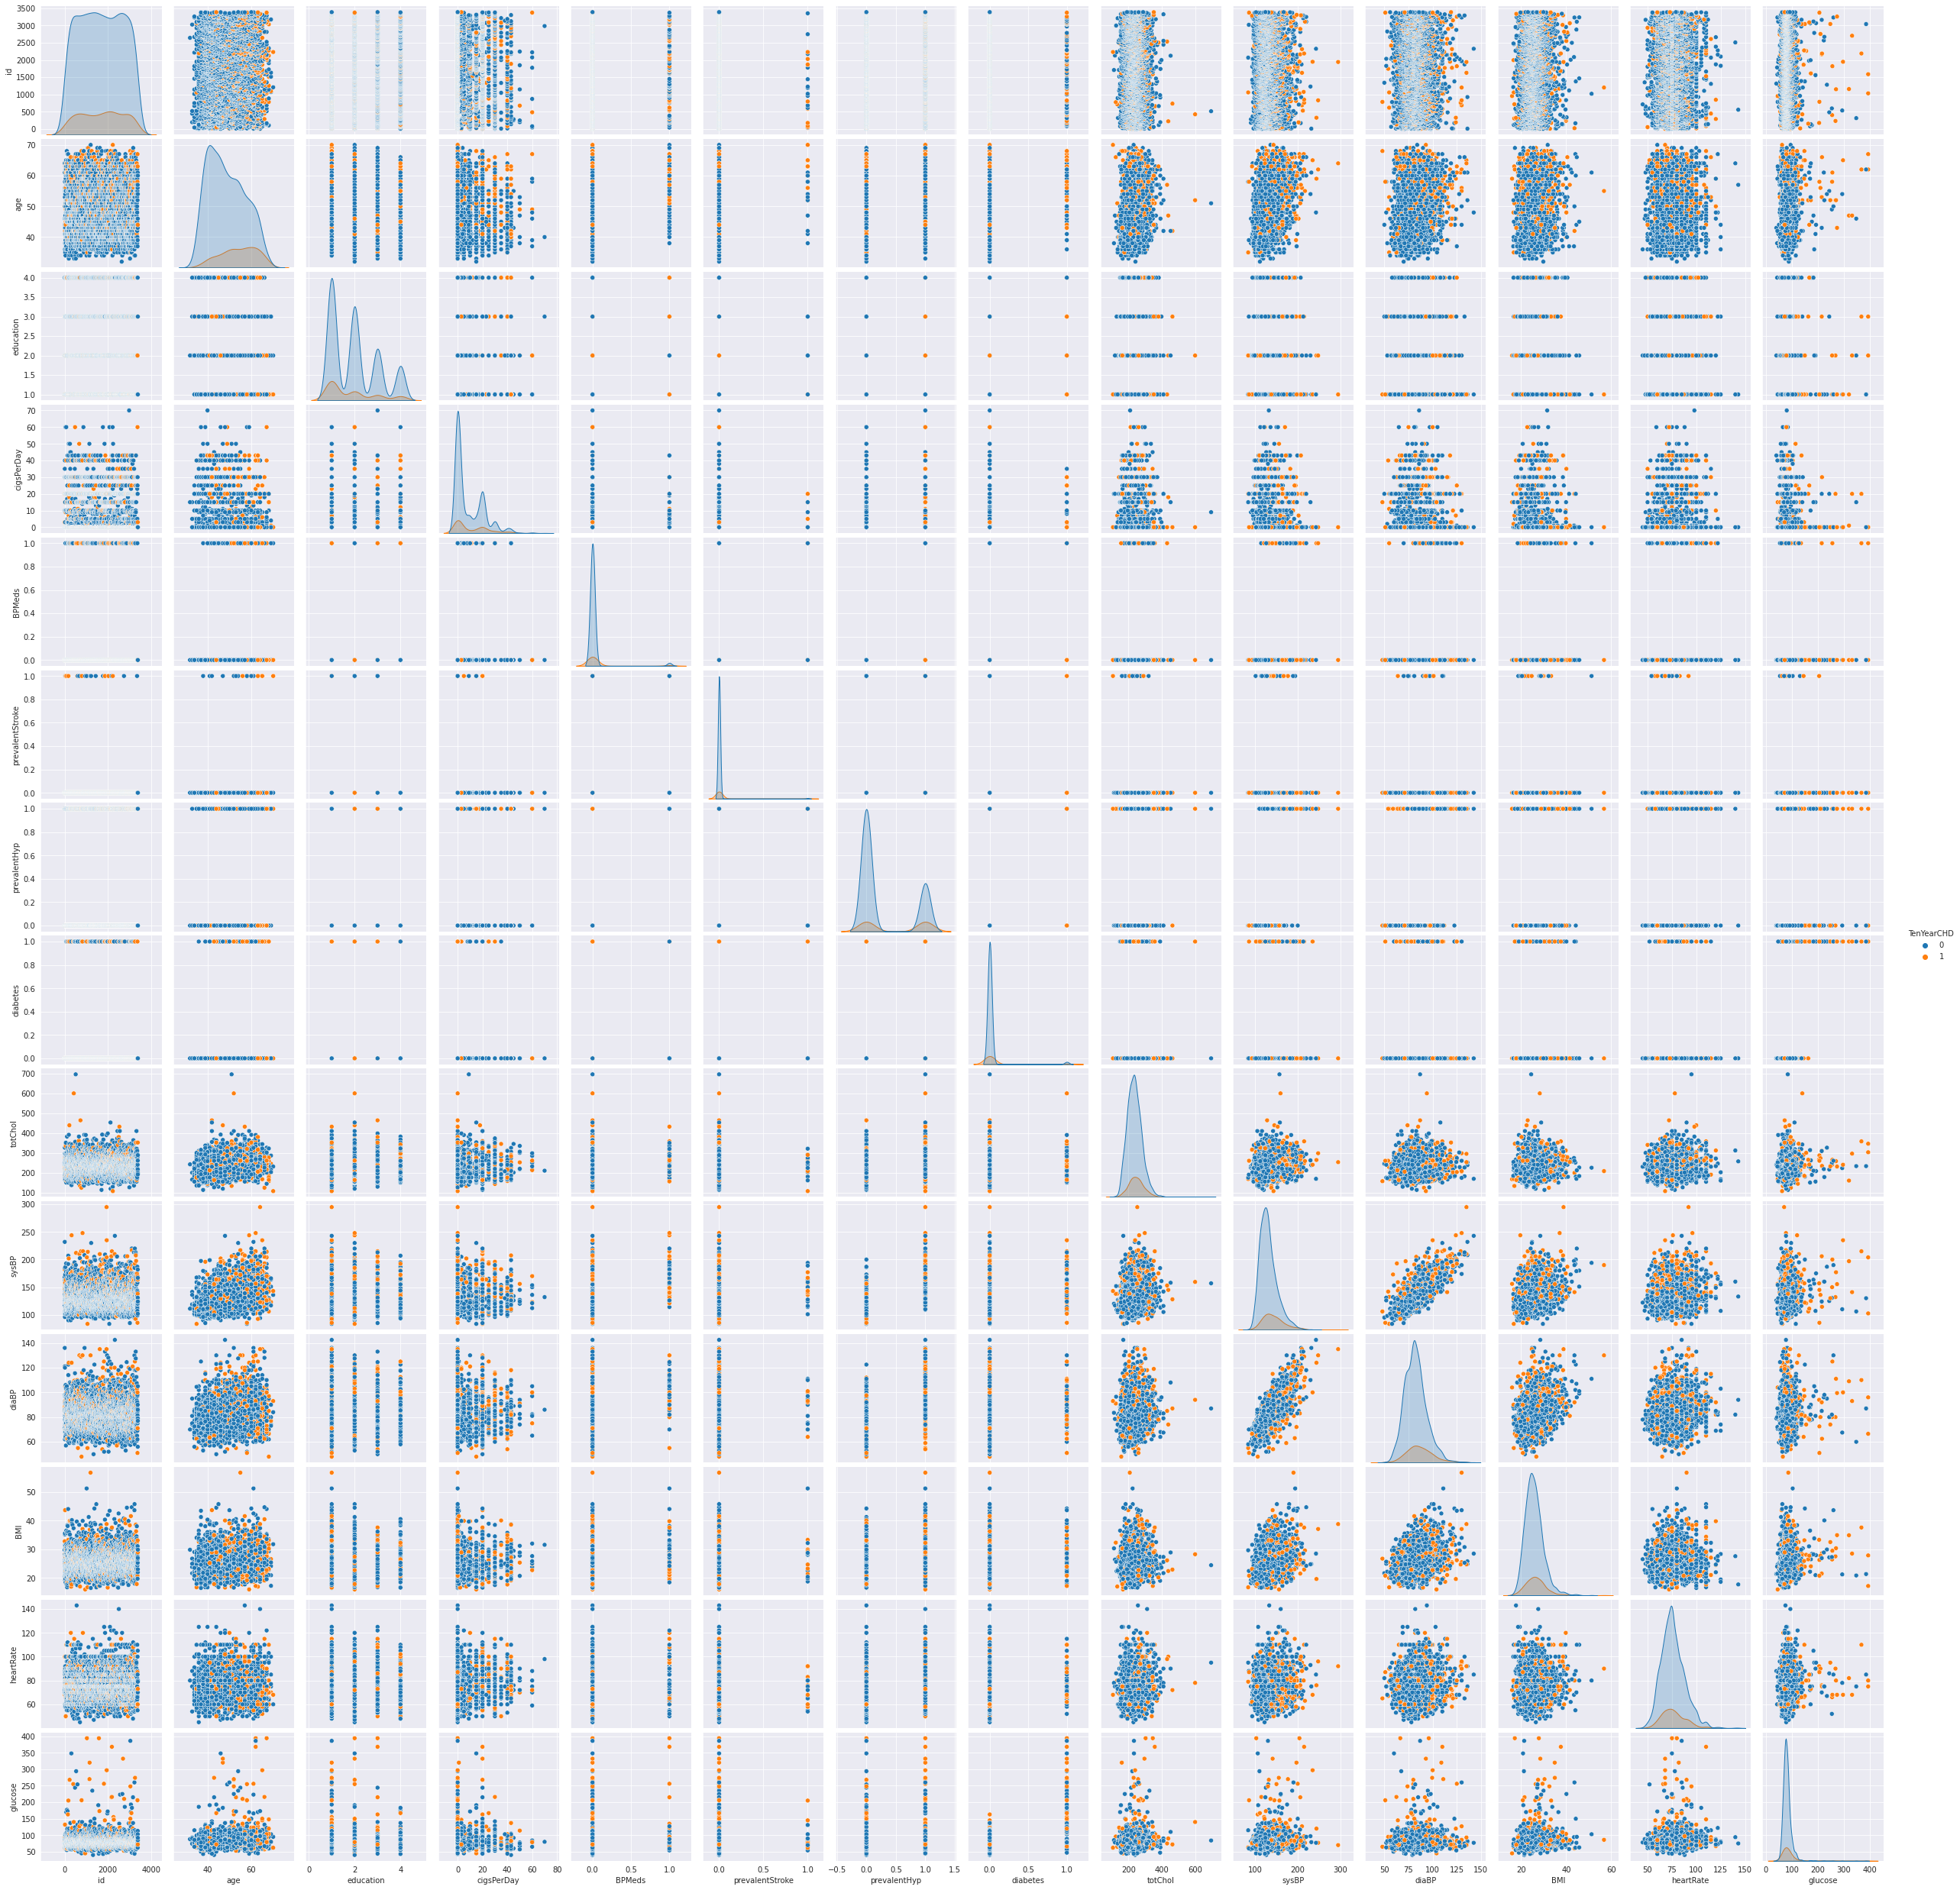

In [ ]:
sns.pairplot(df, hue = 'TenYearCHD');

Text(0.5, 1.0, 'Pie Chart')

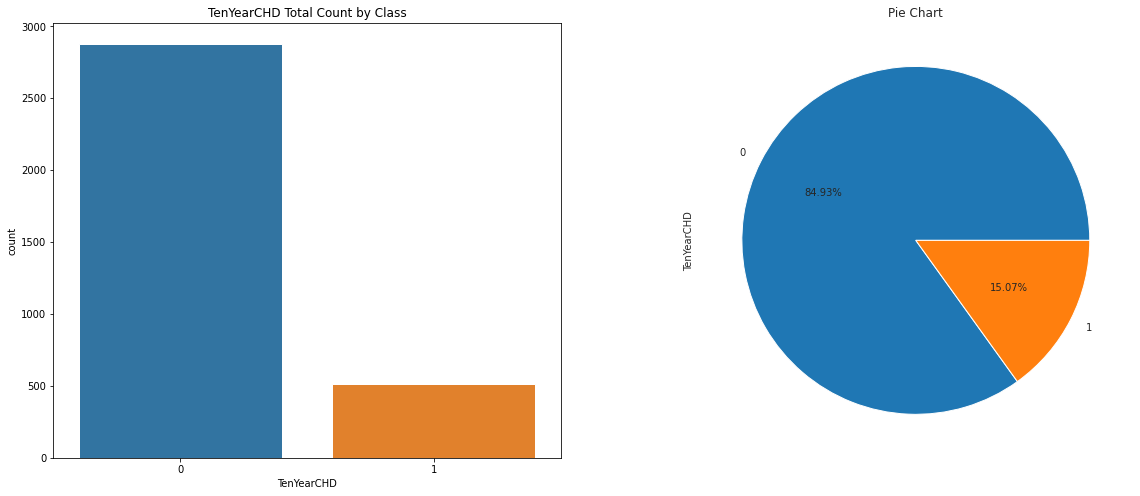

In [ ]:
#plotting the above cell values

plt.subplots(1, 2, figsize = (20, 8))

ax1 = plt.subplot(1, 2, 1)
sns.set_style(style = 'darkgrid');
sns.countplot(df.TenYearCHD);
plt.title('TenYearCHD Total Count by Class')

ax2 = plt.subplot(1, 2, 2)
# explode = [0, 0.1]
df.TenYearCHD.value_counts().plot.pie(autopct='%2.2f%%');
plt.title('Pie Chart')

* From the above graph, it can be concluded that given dataset is imbalanced as there are no sufficient entries of those who develop TenYrCHD compared to those who don't.

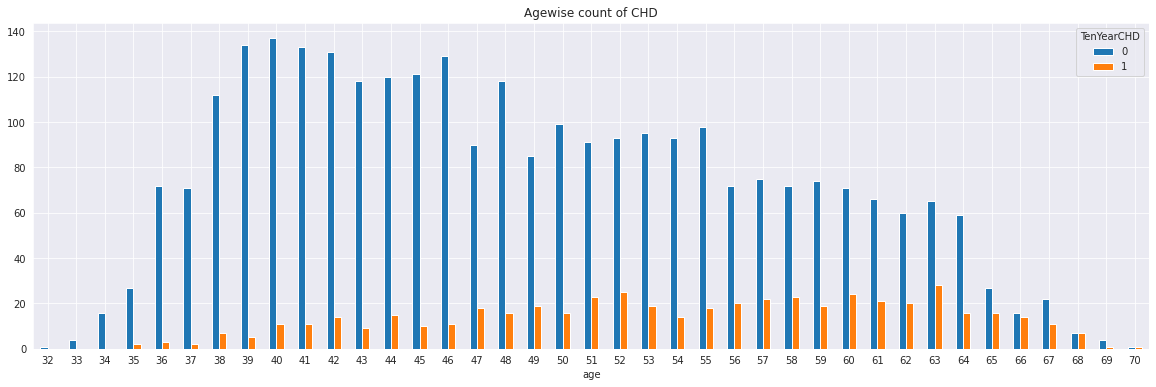

In [ ]:
pd.crosstab(df.age,df.TenYearCHD).plot(kind="bar",figsize=(20,6));
plt.title('Agewise count of CHD');
plt.xticks(rotation = 0);

Text(0.5, 1.0, 'Age-wise distribution')

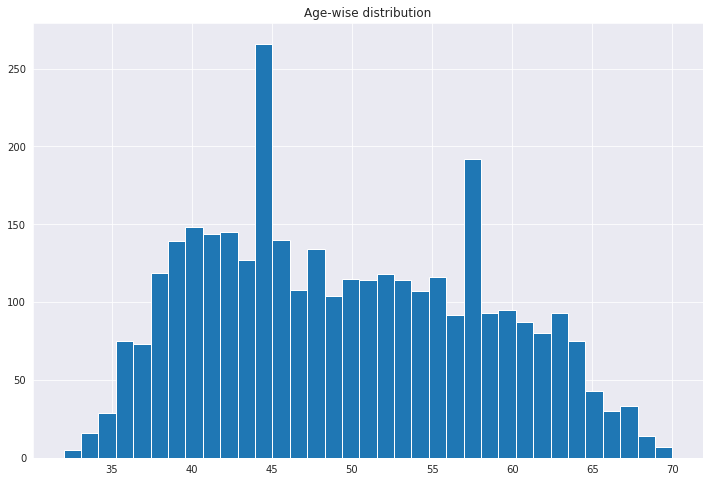

In [ ]:
df.age.hist(bins = 35, );
plt.title('Age-wise distribution')

Text(0.5, 1.0, 'Education')

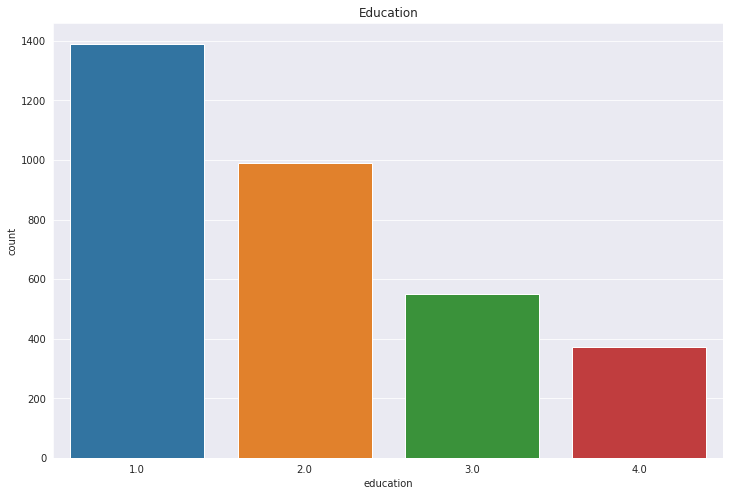

In [ ]:
# countplot of education
sns.countplot(df['education']);
plt.title('Education')

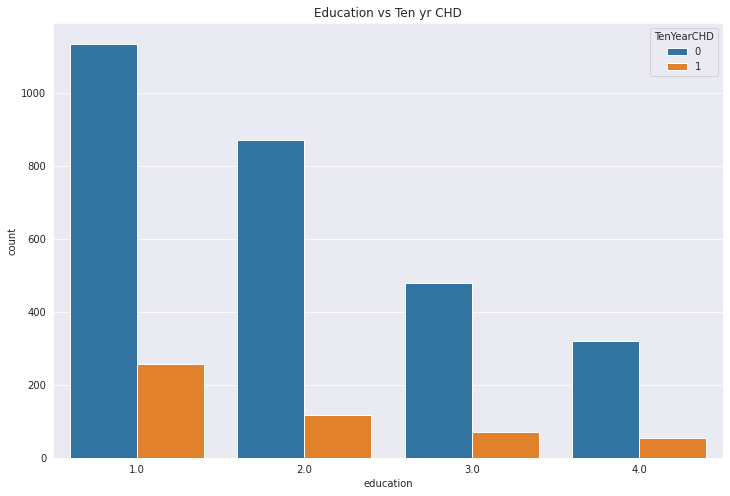

In [ ]:
# sns.barplot(x = df['education'], y = df.TenYearCHD);
sns.countplot(x = df['education'], hue = df.TenYearCHD);

plt.title('Education vs Ten yr CHD');


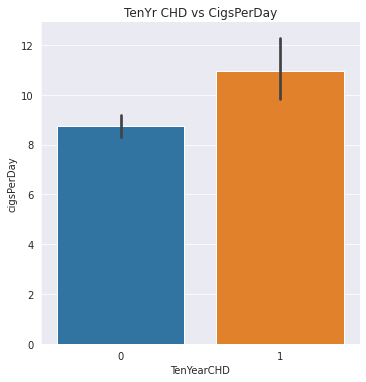

In [ ]:
sns.catplot(x='TenYearCHD', y='cigsPerDay', kind='bar',data=df);
plt.title('TenYr CHD vs CigsPerDay');

* From the aboove graph, we can conclude that generally people who have risk of CHD in the span of 10 years smoke more ciggarettes per day than those who don't develop CHD risk.

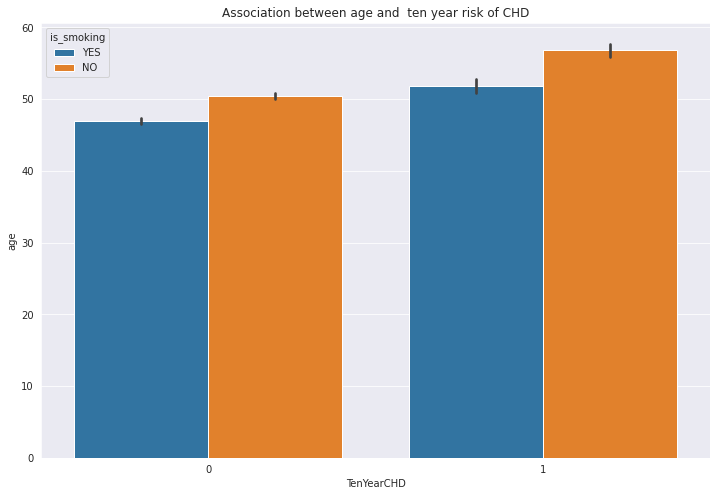

In [ ]:
# boxplot
sns.barplot(x = df.TenYearCHD, y = df.age, hue=df.is_smoking);
plt.title('Association between age and  ten year risk of CHD');

* It can be inferred from the aboe graph that smokers have large risk of developing CHD in young age compared to non smokers.

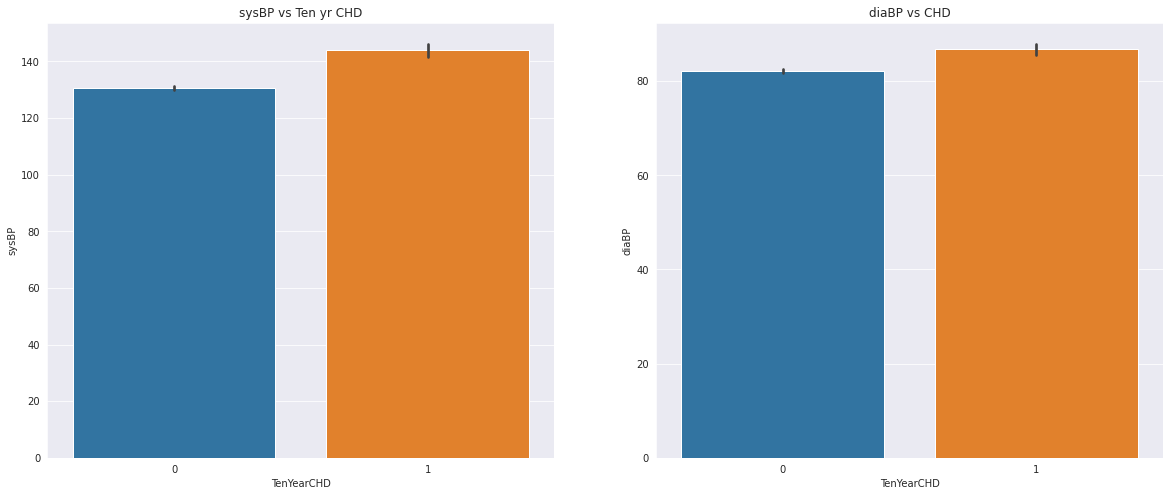

In [ ]:
# plotting bar plot of sysBP and te yr CHD
plt.subplots(1, 2, sharex=True, figsize = (20, 8))


ax1=plt.subplot(1, 2, 1)
sns.barplot( x='TenYearCHD',y='sysBP', data=df);
plt.title('sysBP vs Ten yr CHD');


ax2=plt.subplot( 1, 2, 2)
sns.barplot( x='TenYearCHD',y='diaBP', data=df);
plt.title('diaBP vs CHD');

Text(0.5, 1.0, 'Relation between Age and Prevalent Stroke')

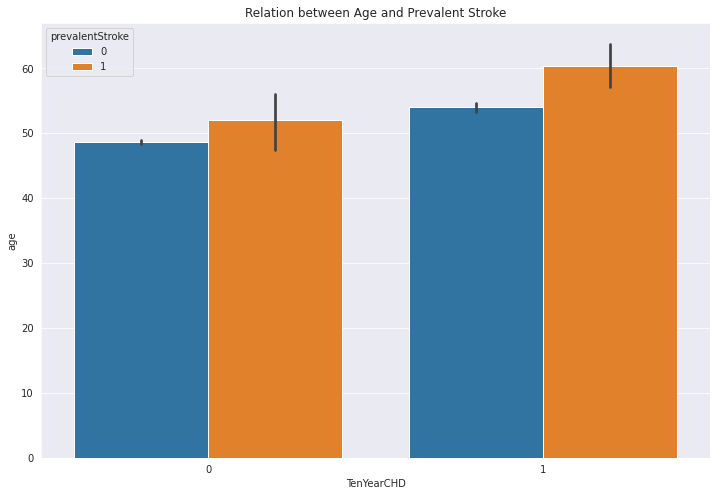

In [ ]:
# boxplot
sns.barplot(x = df.TenYearCHD, y = df.age, hue = df.prevalentStroke);
plt.title('Relation between Age and Prevalent Stroke')

In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

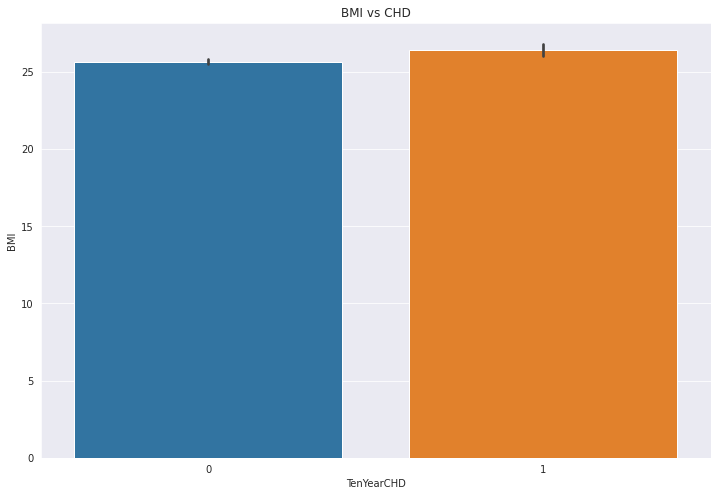

In [ ]:
# plotting bar plot of sysBP and te yr CHD
sns.barplot( x='TenYearCHD',y='BMI', data=df);
plt.title('BMI vs CHD');

* Patients with potential CHD have slightly higher BP than those whose who don't have risk of CHD

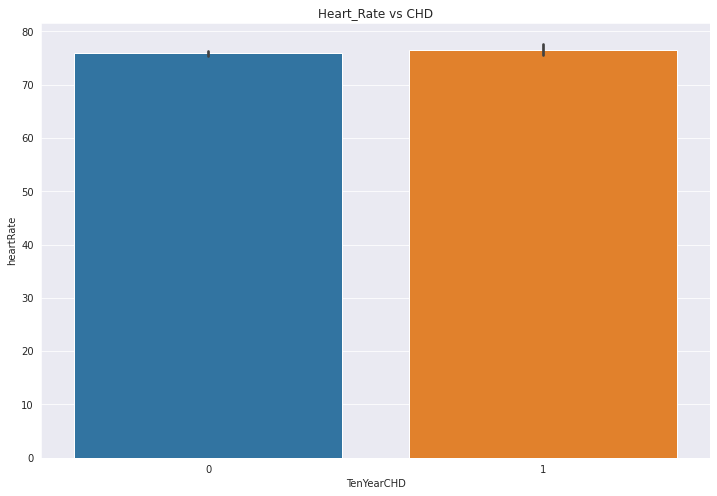

In [ ]:
sns.barplot(y = df.heartRate, x = df.TenYearCHD);
plt.title('Heart_Rate vs CHD');

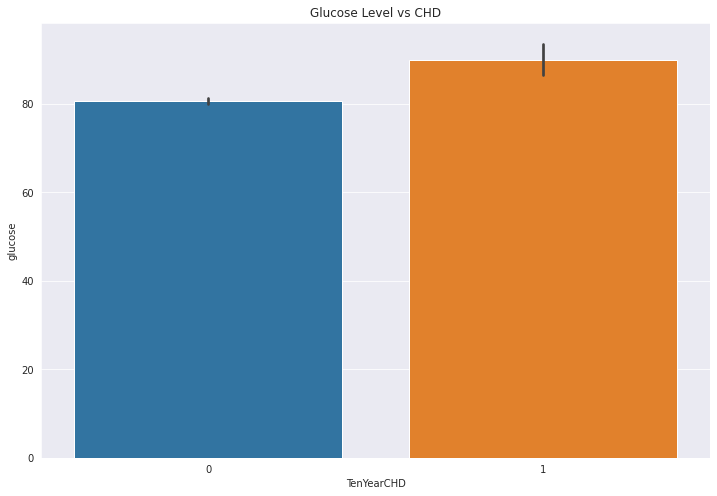

In [ ]:
sns.barplot(y = df.glucose, x = df.TenYearCHD);
plt.title('Glucose Level vs CHD');

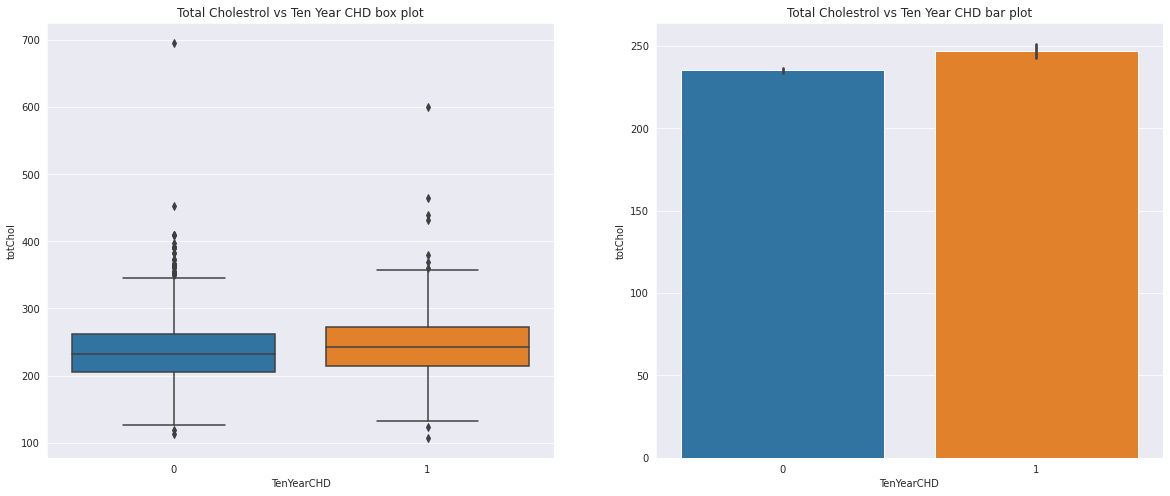

In [ ]:
# plotting totChol vs TenYrCHD 
plt.subplots(1, 2, figsize = (20, 8), sharex = True)

ax1 = plt.subplot(1, 2, 1)
sns.boxplot(x = df.TenYearCHD, y = df.totChol);
plt.title('Total Cholestrol vs Ten Year CHD box plot');

ax1 = plt.subplot(1, 2, 2)
sns.barplot(x = df.TenYearCHD, y = df.totChol);
plt.title('Total Cholestrol vs Ten Year CHD bar plot');

* Upon visualizing the box plot, it can be seen that there total cholesterol levels of people having risk of CHD and people having no risk of CHD are almost same. However, if we see the bar plot, we can see the slight increase in the cholesterol levels of the people haing risk of CHD.

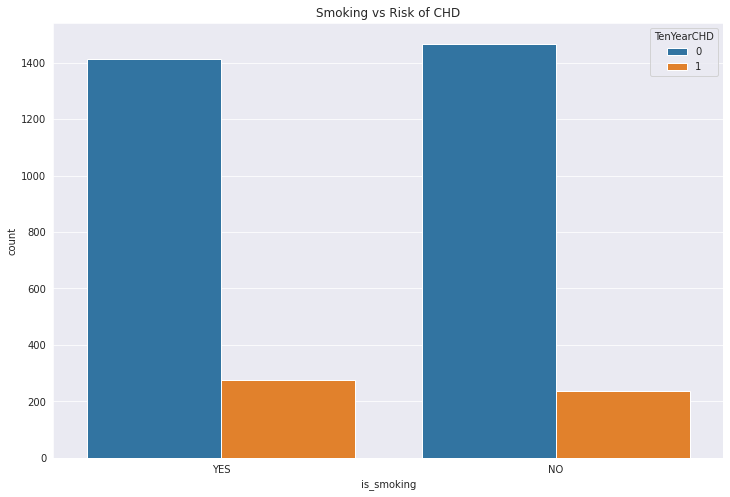

In [ ]:
sns.countplot(df.is_smoking, hue = df.TenYearCHD);
plt.title('Smoking vs Risk of CHD');

* Number of Female non-smokers are more in general than smokers.


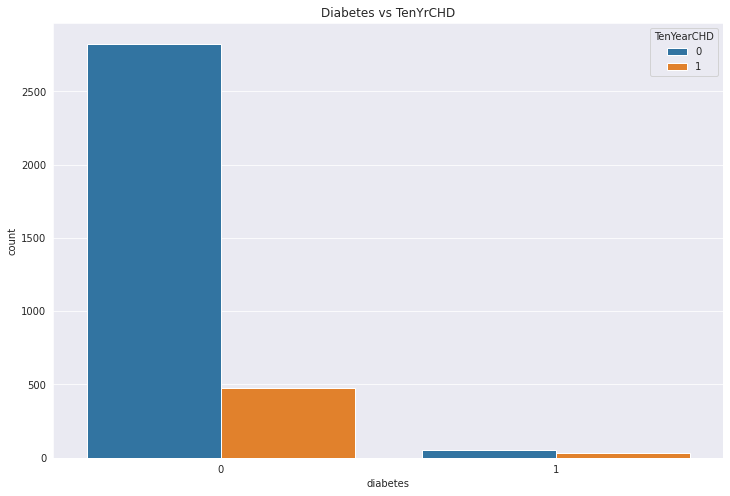

In [ ]:
# plotting sex vs CHD
sns.countplot(df.diabetes, hue = df.TenYearCHD);
plt.title('Diabetes vs TenYrCHD');

### Conclusion from EDA:
* Dataset is imbalanced.
* People who have risk of CHD smoke more cigarettes.
* Smokers have large risk of developing CHD in young age compared to non smokers.
* Those who have high risk of developing CHD, have higher BP compared to those who don't have risk.
* People with TenYrCHD risk have slightly higher BMI though the heart rate between these two is almost the same.
* Females are less prone to developing CHD compared to men which can be seen from graph.

# Feature Engineering

In [ ]:
# Let's not manipulate the original dataset. so making the copy of iriginal dataset for further changes
df1 = df.copy()

In [ ]:
df1.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
# dropping id anf education columns
df1.drop(['id', 'education'], axis= 1, inplace = True)

In [ ]:
df1.head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   64   F        YES         3.0     0.0                0             0   
1   36   M         NO         0.0     0.0                0             1   
2   46   F        YES        10.0     0.0                0             0   
3   50   M        YES        20.0     0.0                0             1   
4   64   F        YES        30.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
0         0    221.0  148.0   85.0    NaN       90.0     80.0           1  
1         0    212.0  168.0   98.0  29.77       72.0     75.0           0  
2         0    250.0  116.0   71.0  20.35       88.0     94.0           0  
3         0    233.0  158.0   88.0  28.26       68.0     94.0           1  
4         0    241.0  136.5   85.0  26.42       70.0     77.0           0

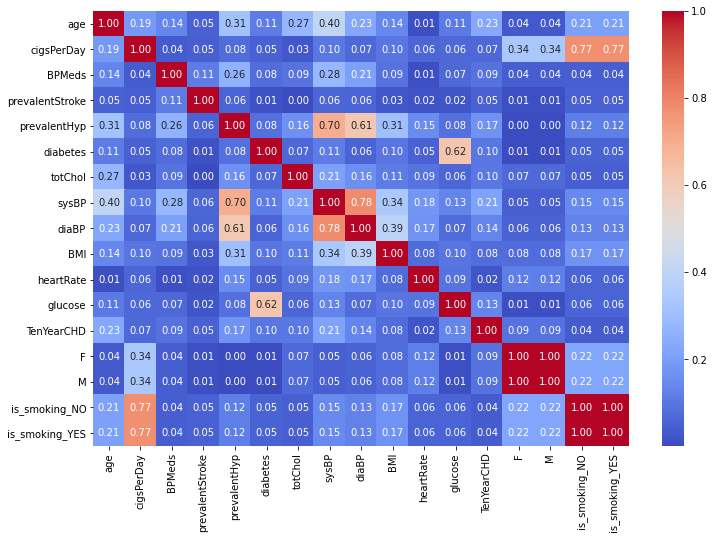

In [ ]:
sns.heatmap(abs(df1.corr()), annot = True, fmt = '.2f', cmap = 'coolwarm')

In [ ]:
dummy = pd.get_dummies(df['sex'])

In [ ]:
dummy

F  M
0     1  0
1     0  1
2     1  0
3     0  1
4     1  0
...  .. ..
3385  1  0
3386  1  0
3387  0  1
3388  0  1
3389  1  0

[3390 rows x 2 columns]

In [ ]:
df1[['F', 'M']] = dummy

In [ ]:
df1.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  F  M  
0           1  1  0  
1           0  0  1  
2           0  1  0  
3           1  0  1  
4           0  1  0

In [ ]:
dummy = pd.get_dummies(df.is_smoking, prefix = 'is_smoking')

In [ ]:
dummy

is_smoking_NO  is_smoking_YES
0                 0               1
1                 1               0
2                 0               1
3                 0               1
4                 0               1
...             ...             ...
3385              1               0
3386              1               0
3387              0               1
3388              1               0
3389              1               0

[3390 rows x 2 columns]

In [ ]:
df1[['is_smoking_NO', 'is_smoking_YES']] = dummy

In [ ]:
df1.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  F  M  is_smoking_NO  is_smoking_YES  
0           1  1  0              0               1  
1           0  0  1              1               0  
2           0  1  0              0               1  
3           1  0  1              0               1  
4           0  1  0              0               1

In [ ]:
df1.drop(['sex', 'is_smoking'], axis = 1, inplace = True)

In [ ]:
df1.dropna(axis = 0, inplace = True)

In [ ]:
df1.shape

(2927, 19)

In [ ]:
df1.columns

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'F', 'M', 'is_smoking_NO',
       'is_smoking_YES'],
      dtype='object')

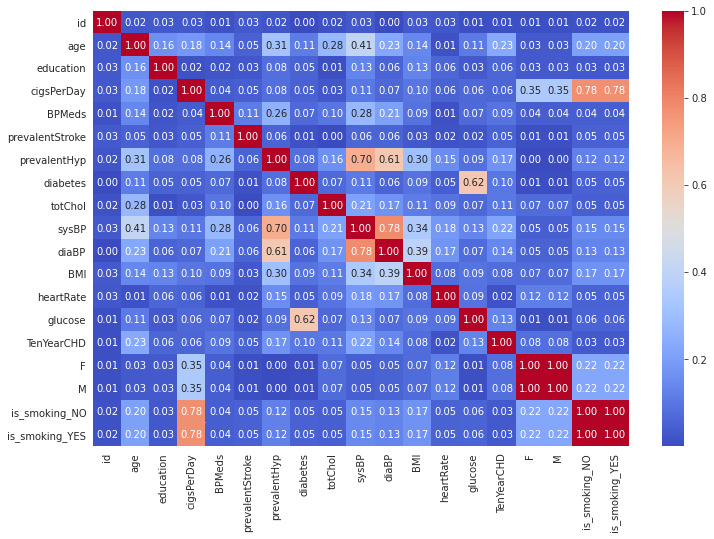

In [ ]:
sns.heatmap(abs(df1.corr()), annot = True, fmt = '.2f', cmap = 'coolwarm');

In [ ]:
#Multicollinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['id', 'TenYearCHD', 'is_smoking_YES', 'M',
                                                            'education']]])


variables         VIF
0               age   41.120555
1        cigsPerDay    4.226017
2            BPMeds    1.143732
3   prevalentStroke    1.024484
4      prevalentHyp    2.370432
5          diabetes    1.600062
6           totChol   31.436044
7             sysBP  135.074825
8             diaBP  128.021476
9               BMI   44.695719
10        heartRate   38.938234
11          glucose   19.369673
12                F    2.701298
13    is_smoking_NO    5.217487

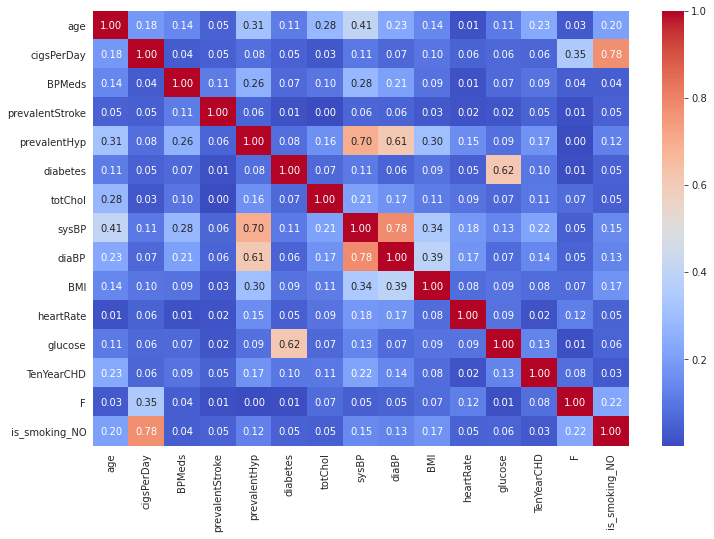

In [ ]:
sns.heatmap(abs(df1.drop(['id', 'is_smoking_YES', 'M','education'], axis = 1).corr()), annot = True, fmt = '.2f', cmap = 'coolwarm');


In [ ]:
lst = ['id', 'TenYearCHD', 'is_smoking_YES', 'M','education', 'heartRate']

In [ ]:
df2 = df1.drop(lst, axis = 1)

In [ ]:
df2.head()

age  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  \
1   36         0.0     0.0                0             1         0    212.0   
2   46        10.0     0.0                0             0         0    250.0   
3   50        20.0     0.0                0             1         0    233.0   
4   64        30.0     0.0                0             0         0    241.0   
5   61         0.0     0.0                0             1         0    272.0   

   sysBP  diaBP    BMI  glucose  F  is_smoking_NO  
1  168.0   98.0  29.77     75.0  0              1  
2  116.0   71.0  20.35     94.0  1              0  
3  158.0   88.0  28.26     94.0  0              0  
4  136.5   85.0  26.42     77.0  1              0  
5  182.0  121.0  32.80     65.0  1              1

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# assigning independent variables to x
X = df2.copy()

In [ ]:
# assigning dependent variable to y
y = df1.TenYearCHD

In [ ]:
X.isna().sum()

age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
glucose            0
F                  0
is_smoking_NO      0
dtype: int64

In [ ]:
y.head()

1    0
2    0
3    1
4    0
5    1
Name: TenYearCHD, dtype: int64

# SMOTE Data Generation Technique 

In [ ]:
X.shape

(2927, 13)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
# generating the data points of minority class (here class 1 is minority class shown in first graph in EDA)
smote = SMOTE(sampling_strategy='minority', random_state = 0)

In [ ]:
X_smote, y_smote = smote.fit_sample(X, y)

In [ ]:
print('Before SMOTE: ', Counter(y))
print('After SMOTE: ', Counter(y_smote))

Before SMOTE:  Counter({0: 2483, 1: 444})
After SMOTE:  Counter({0: 2483, 1: 2483})


Text(0.5, 1.0, 'Values after applying SMOTE')

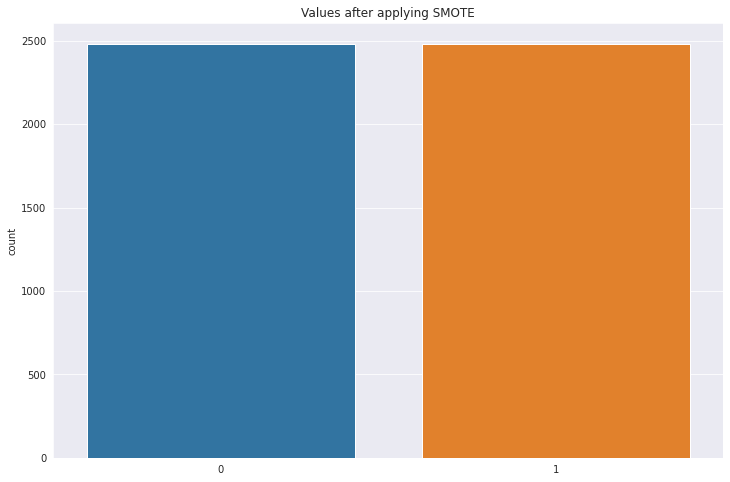

In [ ]:
sns.countplot(y_smote);
plt.title('Values after applying SMOTE')

The data of the two classes are balanced now. So, we will proceed futher.

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 0)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression()

In [ ]:
# fitting the train data
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predicting the values on test data
y_pred = logistic.predict(X_test)

In [ ]:
train_pred = logistic.predict(X_train)

In [ ]:
logistic.coef_

array([[ 2.68972802,  0.69346849,  0.38535006,  1.12998502,  0.13707503,
         0.16856583,  0.89457057,  2.0397165 ,  0.43861692,  0.53185033,
         2.04139578, -0.58109918, -0.45330556]])

In [ ]:
logistic.intercept_

array([-2.36649985])

# Evaluation of Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [ ]:
accuracy_score(y_train, train_pred)

0.6754783484390735

In [ ]:
accuracy_score(y_test, y_pred)

0.6800804828973843

In [ ]:
# getting the classification report for test data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.58      0.64       491
           1       0.66      0.78      0.71       503

    accuracy                           0.68       994
   macro avg       0.69      0.68      0.68       994
weighted avg       0.69      0.68      0.68       994



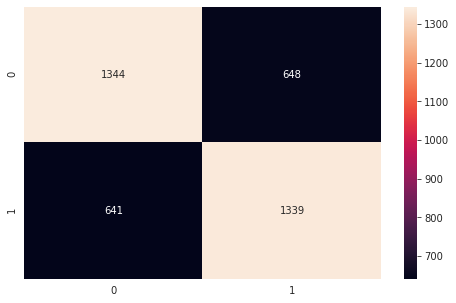

In [ ]:
# confusion matrix for train data
plt.rcParams['figure.figsize'] = 8, 5
sns.heatmap(confusion_matrix(y_train, train_pred), annot = True, fmt = '.4g');

In [ ]:
pd.crosstab(y_train, train_pred)

col_0     0     1
row_0            
0      1344   648
1       641  1339

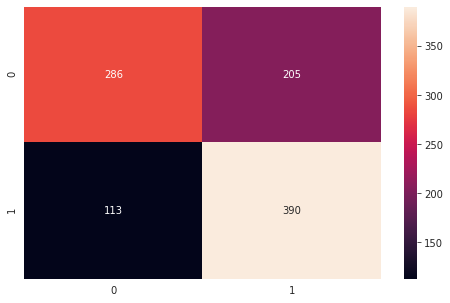

In [ ]:
# confusion matrix for test data
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.4g')

In [ ]:
pd.crosstab(y_test, y_pred)

col_0    0    1
row_0          
0      286  205
1      113  390

In [ ]:
print(roc_auc_score(y_train, train_pred))

0.6754807107216745


In [ ]:
roc_auc_score(y_test, y_pred)

0.6789163187878835

# Conclusions from Logistic Regression:
* Values of precision and recall are almost same.
* Accuracy of training and testing dataset is almost same aroud 68%.
* The roc_auc scoore of train and test data is 67.5% and 67.8% respectively. This seems to be good but the score is less so we will try with other models.

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
# fitting the data in decision tree
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
train_pred = tree.predict(X_train)

In [ ]:
# predicting the values
y_pred = tree.predict(X_test)

In [ ]:
# checking the feature importance
tree.feature_importances_

array([0.18407735, 0.05774245, 0.0009651 , 0.0063826 , 0.05059613,
       0.00148661, 0.10185348, 0.11527985, 0.07696565, 0.07707472,
       0.10030599, 0.18917603, 0.03809403])

# Performance Evaluation

In [ ]:
# accuracy of train class
accuracy_score(y_train, train_pred)

1.0

In [ ]:
# accuracy of test class
accuracy_score(y_test, y_pred)

0.7565392354124748

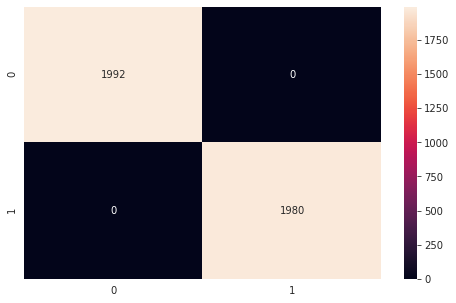

In [ ]:
# confusion matric train 
sns.heatmap(confusion_matrix(y_train, train_pred), annot = True, fmt = '.4g');

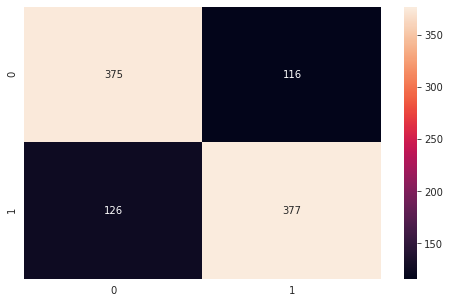

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.4g');

In [ ]:
# roc auc for train dataset
roc_auc_score(y_train, train_pred)

1.0

In [ ]:
# roc auc for test dataset
roc_auc_score(y_test, y_pred)

0.7566252181412544

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       491
           1       0.76      0.75      0.76       503

    accuracy                           0.76       994
   macro avg       0.76      0.76      0.76       994
weighted avg       0.76      0.76      0.76       994



# Conclusions from Decision Tree:
* Accuracy of the training model is 1.0 while that of testing model is 75.5%.
* Model seems to be overfitted.

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier()

In [ ]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
train_pred = forest.predict(X_train)

In [ ]:
accuracy_score(y_train, train_pred)

1.0

In [ ]:
# predicting the test data
y_pred = forest.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.817907444668008

In [ ]:
# printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.82       491
           1       0.86      0.77      0.81       503

    accuracy                           0.82       994
   macro avg       0.82      0.82      0.82       994
weighted avg       0.82      0.82      0.82       994



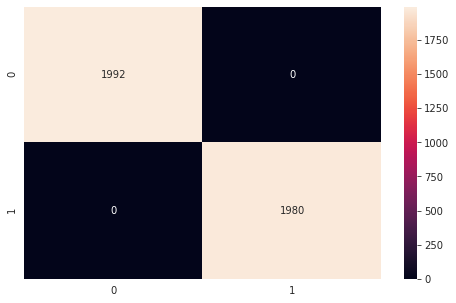

In [ ]:
# confusion matrix for train
sns.heatmap(confusion_matrix(y_train, train_pred), annot = True, fmt = '.4g');

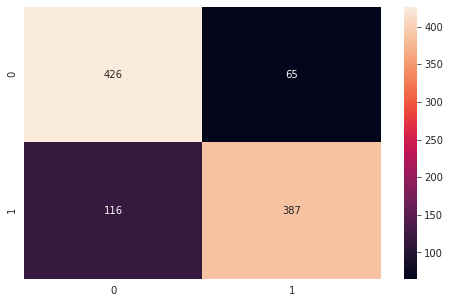

In [ ]:
# confusion matric for test
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.4g')

In [ ]:
# printing the roc_auc score
from sklearn.metrics import roc_auc_score

In [ ]:
# printing the roc_auc score for train data
roc_auc_score(y_train,train_pred)

1.0

In [ ]:
# printing the roc_auc score for test data
roc_auc_score(y_test,y_pred)

0.8185004028780475

# Plotting the feature importance

In [ ]:
features = X.columns
importance = forest.feature_importances_
indices = np.argsort(importance)

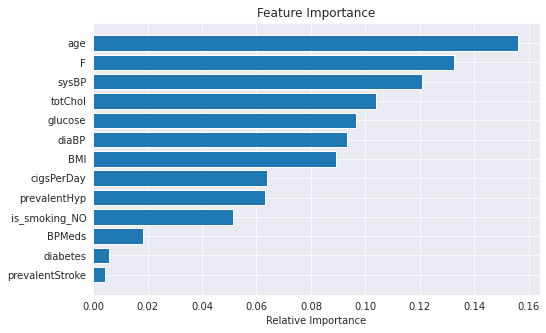

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Conclusions from Random Forest:
* Random Forest gives train data accuracy of 1 whilte test data accuracy of aounrd 81.7%.
* Random Forest classifier gives better Precision and Recall values than Logistic Regression and Decision Tree algorithms. 
* The train data accuracy is 1 which says that training data is overfitted but this can be elliminated using randomized searchCV or GridSearchCV.
* Confusion Matrix looks better for this algorithm than decision tree.

# Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# defining hyperperapmmeter values

# Number of trees
n_estimators = [5, 10, 15]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10]


# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
forest_cv = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=forest_cv,
                       param_grid = param_dict,
                       cv = 5, verbose = 2, scoring='roc_auc')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=5, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=5, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=5, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=5, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=5 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=5, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=4, min_sam

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=15 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=15, total=   0.1s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=15 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=15, total=   0.1s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=15 
[CV]  max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=15, total=   0.1s
[CV] max_depth=4, min_samples_leaf=5, min_samples_split=10, n_e

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   11.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 15}

In [ ]:
train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8655589123867069
The accuracy on test dataset is 0.7887323943661971


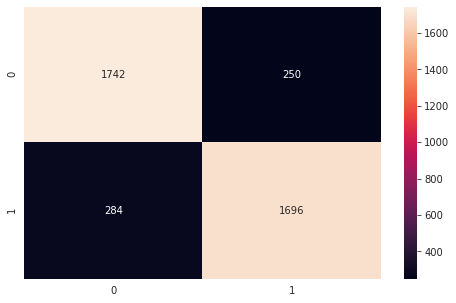

In [ ]:
# Get the confusion matrices for train and test
sns.heatmap(confusion_matrix(y_train,train_class_preds), annot = True, fmt = '.4g');

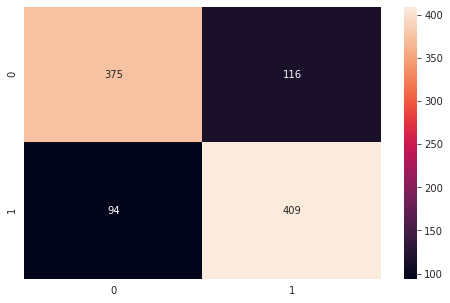

In [ ]:
# confusion matrix f or test class
sns.heatmap(confusion_matrix(y_test,test_class_preds), annot = True, fmt = '.4g')

In [ ]:
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       491
           1       0.78      0.81      0.80       503

    accuracy                           0.79       994
   macro avg       0.79      0.79      0.79       994
weighted avg       0.79      0.79      0.79       994



In [ ]:
# roc_auc score train data
roc_auc_score(y_train,train_preds)

0.9454592359336337

In [ ]:
# roc_auc score test data
roc_auc_score(y_test,test_preds)

0.874330392391071

In [ ]:
rf_optimal_model.feature_importances_

array([0.20129507, 0.04839847, 0.01649976, 0.00153588, 0.10811941,
       0.0057042 , 0.0630023 , 0.09581635, 0.05306788, 0.03873831,
       0.05087816, 0.24185533, 0.07508888])

# Conclusions from Hyperparameter Tuning:
* The overfitting of the model was removed by tuning various hyperparameters.
* the roc_auc score of both train and test data is around 94% which is considered a good model compared to previous one where roc_auc score of train model is 1.0 and test model is 87%.

# XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg = XGBClassifier(n_jobs = -1)

In [ ]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# predictions on test data
y_pred = xg.predict(X_test)

In [ ]:
# predictions on train data to calculate roc_auc
y_pred_train = xg.predict(X_train)

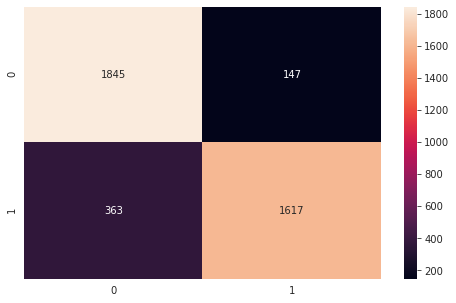

In [ ]:
# confusion matrix for train data
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot = True, fmt = '.4g');

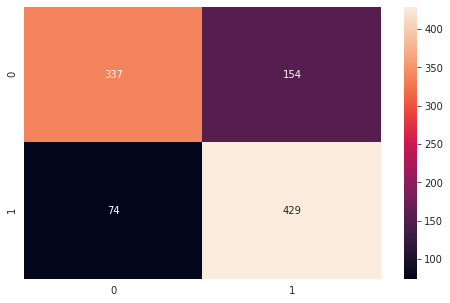

In [ ]:
# confusion matrix for test data
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.4g');

In [ ]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75       491
           1       0.74      0.85      0.79       503

    accuracy                           0.77       994
   macro avg       0.78      0.77      0.77       994
weighted avg       0.78      0.77      0.77       994



In [ ]:
# roc_auc score of train data
roc_auc_score(y_train, y_pred_train)

0.8714357429718875

In [ ]:
# roc_auc score of test data
roc_auc_score(y_test, y_pred)

0.7696185412980368

# Conclusions from XGBOOST:
* There is reduction in overall performance metrics in xgboost algorithm. 
* In random forest along with hyperparameter tuning, precision and recall values are quite descent along with auc_roc score compared to other algorithms.